*italicized text*## Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
unique_values = application_df.nunique()
print(unique_values)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_type_count = application_df['APPLICATION_TYPE'].value_counts()
print(application_type_count)

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

cutoff_value = 1000

application_types_to_replace = list(application_type_count[application_type_count < cutoff_value].index)


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df['CLASSIFICATION'].value_counts()
print(application_df['CLASSIFICATION'].value_counts())


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64


In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

classification_counts = application_df['CLASSIFICATION'].value_counts()


classification_cutoff_value = 1000

classifications_to_replace = list(classification_counts[classification_counts < classification_cutoff_value].index)


# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [56]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_categorized = pd.get_dummies(application_df, columns=['APPLICATION_TYPE','AFFILIATION','CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'], drop_first=True)
application_df_categorized.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_Family/Parent,AFFILIATION_Independent,...,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,108590,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,6692,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,1,142590,1,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0


In [57]:
# Split our preprocessed data into our features and target arrays
X = application_df_categorized.drop("IS_SUCCESSFUL", axis=1)
y = application_df_categorized["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (25724, 33)
X_test Shape: (8575, 33)
y_train Shape: (25724,)
y_test Shape: (8575,)


In [58]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [59]:
X_train.shape

(25724, 33)

In [ ]:
## Compile, Train and Evaluate the Model #1


In [60]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

model_1 = tf.keras.models.Sequential()

# First hidden layer
model_1.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=33))

# Second hidden layer
model_1.add(tf.keras.layers.Dense(units=5, activation="relu"))

# Output layer
model_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
model_1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 5)                 170       
                                                                 
 dense_96 (Dense)            (None, 5)                 30        
                                                                 
 dense_97 (Dense)            (None, 1)                 6         
                                                                 
Total params: 206 (824.00 Byte)
Trainable params: 206 (824.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
# Compile the model
model_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [62]:
# Train the model
fit_model = model_1.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.6275 - accuracy: 0.6617
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5848 - accuracy: 0.7058
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5743 - accuracy: 0.7254
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5704 - accuracy: 0.7259
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5685 - accuracy: 0.7255
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5669 - accuracy: 0.7257
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5654 - accuracy: 0.7250
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5638 - accuracy: 0.7263
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5626 - accuracy: 0.7258
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5617 - accura

In [63]:
# Evaluate the model using the test data
model_loss, model_accuracy = model_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5586 - accuracy: 0.7280 - 453ms/epoch - 2ms/step
Loss: 0.5585770606994629, Accuracy: 0.7280466556549072


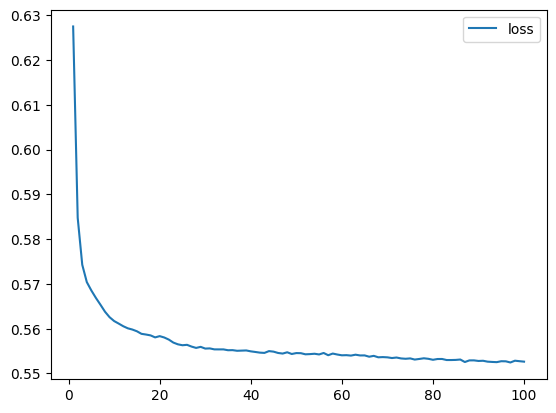

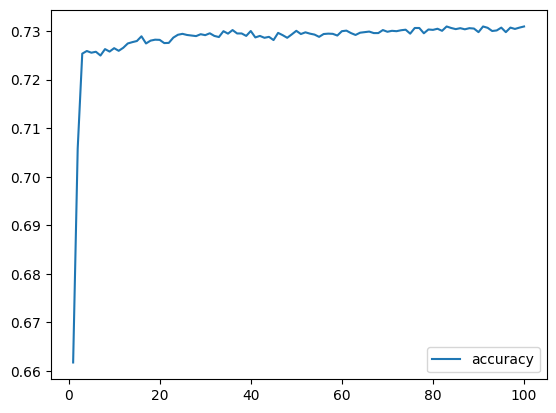

In [64]:
import matplotlib.pyplot as plt


# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [56]:
# Export the model to HDF5 file
model_1.save("AlphabetSoup_Optimization_Model_1.keras")
model_1.save('AlphabetSoupCharity_Optimization_model_1.h5', save_format='h5')

In [16]:
## Compile, Train and Evaluate the Model #2


In [83]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
model_2 = tf.keras.models.Sequential()

# First hidden layer
model_2.add(tf.keras.layers.Dense(units=20, activation="relu", input_dim=33))

# Multiple hidden layers
model_2.add(tf.keras.layers.Dense(units=10, activation="relu"))

model_2.add(tf.keras.layers.Dense(units=8, activation = "relu"))

model_2.add(tf.keras.layers.Dense(units=6, activation="relu"))

model_2.add(tf.keras.layers.Dense(units=4, activation="sigmoid"))

model_2.add(tf.keras.layers.Dense(units=2, activation="sigmoid"))


# Output layer
model_2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

model_2.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_143 (Dense)           (None, 20)                680       
                                                                 
 dense_144 (Dense)           (None, 10)                210       
                                                                 
 dense_145 (Dense)           (None, 8)                 88        
                                                                 
 dense_146 (Dense)           (None, 6)                 54        
                                                                 
 dense_147 (Dense)           (None, 4)                 28        
                                                                 
 dense_148 (Dense)           (None, 2)                 10        
                                                                 
 dense_149 (Dense)           (None, 1)               

In [84]:
# Compile the model
model_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [85]:
# Train the model
fit_model_2 = model_2.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 52s 2ms/step - loss: 0.6511 - accuracy: 0.6279
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.6069 - accuracy: 0.7165
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5939 - accuracy: 0.7183
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5891 - accuracy: 0.7198
Epoch 5/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5866 - accuracy: 0.7203
Epoch 6/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5847 - accuracy: 0.7216
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5837 - accuracy: 0.7205
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5829 - accuracy: 0.7212
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5823 - accuracy: 0.7214
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5819 - accuracy: 0.721

In [86]:
# Evaluate the model using the test data
model_loss, model_accuracy = model_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5579 - accuracy: 0.7325 - 533ms/epoch - 2ms/step
Loss: 0.5579497218132019, Accuracy: 0.732478141784668


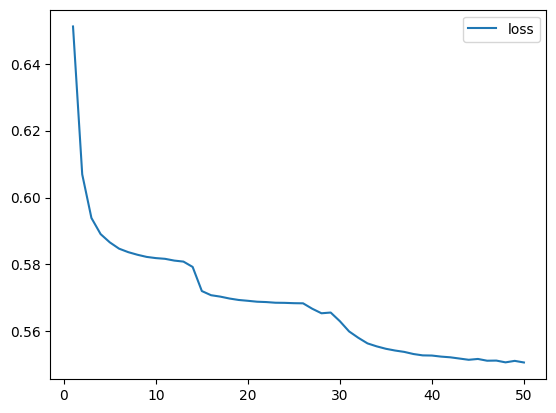

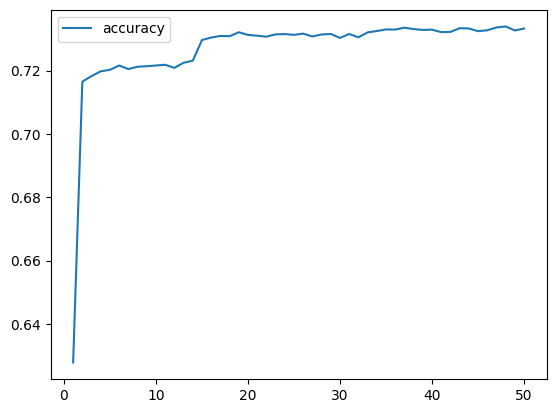

In [87]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model_2.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [88]:
# Export the model to HDF5 file
model_2.save("AlphabetSoup_Optimization_Model_2.keras")
model_2.save('AlphabetSoupCharity_Optimization_model_2.h5', save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
